In [13]:
!pip install jovian --upgrade --quiet

In [14]:
import csv
import matplotlib.pyplot as plt

def lire_donnees_csv(chemin_fichier):
    categories = []
    valeurs = []
    couleurs = []  # Ajout d'une liste pour stocker les couleurs
    with open(chemin_fichier, 'r', newline='') as csvfile:
        lecteur_csv = csv.reader(csvfile, delimiter=';')  # Assurez-vous que le délimiteur correspond à votre fichier
        for ligne in lecteur_csv:
            if float(ligne[1]) != 0.0:
                categories.append(ligne[0])  # Supposons que les catégories sont dans la troisième colonne
                valeurs.append(float(ligne[1]))  # Supposons que les valeurs sont dans la cinquième colonne
                couleurs.append(ligne[2])  # Supposons que les codes de couleur sont dans la sixième colonne
    return categories, valeurs, couleurs  # Modification pour renvoyer également les couleurs

def generer_diagramme_circulaire(categories, valeurs, couleurs):
    plt.figure(figsize=(8, 8))
    plt.pie(valeurs, labels=categories, autopct='%1.1f%%', colors=couleurs)  # Utilisation des couleurs définies
    plt.title('Camembert 1 Département de Génie Télécommmunication et Réseaux')
    plt.show()
    

def generer_diagramme_circulaire2(categories, valeurs, couleurs):
    plt.figure(figsize=(8, 8))
    plt.pie(valeurs, labels=categories, autopct='%1.1f%%', colors=couleurs)  # Utilisation des couleurs définies
    plt.title('Camembert 2 Département de Génie Télécommmunitaion et Réseaux')
    plt.show()
    

def generer_diagramme_circulaire3(categories, valeurs, couleurs,titre):
    plt.figure(figsize=(8, 8))
    plt.pie(valeurs, labels=categories, autopct='%1.1f%%', colors=couleurs)  # Utilisation des couleurs définies
    plt.title(titre)
    plt.show()

def generer_diagramme_circulaire4(categories, valeurs, couleurs, titre, taille_police):
    plt.figure(figsize=(8, 8))
    plt.pie(valeurs, labels=categories, autopct='%1.1f%%', colors=couleurs, textprops={'fontsize': taille_police})
    plt.title(titre)
    plt.show()




In [15]:
def lire_donnees_csv2(chemin_fichier):
    categories = []
    valeurs = []
    couleurs = []  # Ajout d'une liste pour stocker les couleurs
    with open(chemin_fichier, 'r', newline='') as csvfile:
        lecteur_csv = csv.reader(csvfile, delimiter=';')  # Assurez-vous que le délimiteur correspond à votre fichier
        for ligne in lecteur_csv:
            if float(ligne[4]) != 0.0:
                categories.append(ligne[3])  # Supposons que les catégories sont dans la troisième colonne
                valeurs.append(float(ligne[4]))  # Supposons que les valeurs sont dans la cinquième colonne
                couleurs.append(ligne[5])  # Supposons que les codes de couleur sont dans la sixième colonne
    return categories, valeurs, couleurs  # Modification pour renvoyer également les couleurs


In [16]:
import pandas as pd

def process_csv(input_file, output_file, column_name, replacements, separator=';'):
    # Lire le fichier CSV avec le séparateur spécifié
    df = pd.read_csv(input_file, sep=separator)
    print(df.head())
    print(df.columns)
    
    # Vérifier si la colonne existe dans le dataframe
    if column_name not in df.columns:
        raise ValueError(f"La colonne {column_name} n'existe pas dans le fichier CSV.")
    
    # Remplacer les valeurs dans la colonne
    df[column_name] = df[column_name].replace(replacements)
    
    # Compter les occurrences finales des différentes valeurs
    value_counts = df[column_name].value_counts()
    
    # Convertir les résultats en dataframe
    result_df = value_counts.reset_index()
    result_df.columns = [column_name, 'Occurrences']
    
    # Sauvegarder le résultat dans un nouveau fichier CSV avec le même séparateur
    result_df.to_csv(output_file, sep=separator, index=False)
    
    print(f"Le fichier de sortie a été sauvegardé sous {output_file}")



# Dictionnaire de remplacement : {ancienne_valeur: nouvelle_valeur}
replacements = {
    'PI': 'I',
    'PMI': 'MI',
    'PTI': 'TI',
    'PS': 'S',
    'PMS': 'MS',
    'PTS': 'TS',
    # Ajouter d'autres remplacements si nécessaire
}

In [17]:
import pandas as pd

def convert_to_percentage(input_file, output_file, column_name, separator=';'):
    # Lire le fichier CSV avec le séparateur spécifié
    df = pd.read_csv(input_file, sep=separator)
    
    # Vérifier si la colonne existe dans le dataframe
    if column_name not in df.columns:
        raise ValueError(f"La colonne {column_name} n'existe pas dans le fichier CSV.")
    
    # Calculer la somme des valeurs de la colonne cible
    column_sum = df[column_name].sum()
    
    # Convertir chaque valeur de la colonne en pourcentage de la somme
    df[column_name] = (df[column_name] / column_sum) * 100
    
    # Sauvegarder le résultat dans un nouveau fichier CSV avec le même séparateur
    df.to_csv(output_file, sep=separator, index=False)
    
    print(f"Le fichier de sortie a été sauvegardé sous {output_file}")


In [18]:
# add new colunm base existing one 

def add_column_based_on_dict(input_file, output_file, base_column, new_column, replacements, separator=','):
    # Lire le fichier CSV avec le séparateur spécifié
    df = pd.read_csv(input_file, sep=separator)
    
    # Vérifier si la colonne de base existe dans le dataframe
    if base_column not in df.columns:
        raise ValueError(f"La colonne {base_column} n'existe pas dans le fichier CSV.")
    
    # Ajouter une nouvelle colonne en utilisant le dictionnaire de correspondance
    df[new_column] = df[base_column].map(replacements)
    
    # Sauvegarder le DataFrame modifié dans un nouveau fichier CSV avec le même séparateur
    df.to_csv(output_file, sep=separator, index=False)
    
    print(f"Le fichier de sortie a été sauvegardé sous {output_file}")


# 	0.00	
# 	1.33	#FF610F
# MI	1.33	#E9941B
# MS	8.00	#07A5CB
# S	57.33	#1BB99A
# TS	32.00	#106957

# Dictionnaire de correspondance : {valeur_base: valeur_nouvelle}
replacements2 = {
    'TI': '#FF0009',
    'I': '#FF610F',
    'MI': '#E9941B',
    'MS': '#07A5CB',
    'S': '#1BB99A',
    'TS': '#106957'
    # Ajouter d'autres correspondances si nécessaire
}


In [19]:
import pandas as pd

def merge_and_aggregate(input_file, output_file, merge_column, values_to_merge, new_value, sum_column, separator=','):
    # Lire le fichier CSV avec le séparateur spécifié
    df = pd.read_csv(input_file, sep=separator)
    
    # Vérifier si les colonnes existent dans le dataframe
    if merge_column not in df.columns or sum_column not in df.columns:
        raise ValueError(f"Les colonnes {merge_column} et/ou {sum_column} n'existent pas dans le fichier CSV.")
    
    # Fusionner les valeurs spécifiées dans la colonne de fusion en une seule valeur
    df[merge_column] = df[merge_column].replace(values_to_merge, new_value)
    
    # Agréger les valeurs de la colonne de somme par la colonne fusionnée
    aggregated_df = df.groupby(merge_column, as_index=False)[sum_column].sum()
    
    # Sauvegarder le DataFrame agrégé dans un nouveau fichier CSV avec le même séparateur
    aggregated_df.to_csv(output_file, sep=separator, index=False)
    
    print(f"Le fichier de sortie a été sauvegardé sous {output_file}")


In [20]:
# Exemples d'utilisation 1 
input_file = 'global UIT.csv'  # Nom du fichier CSV d'entrée
output_file = 'globalUIT1_output.csv'  # Nom du fichier CSV de sortie
column_name = 'NF'  # Nom de la colonne à traiter

# Appel de la fonction avec le séparateur point-virgule
process_csv(input_file, output_file, column_name, replacements, separator=';')

# Exemples d'utilisation 2
input_file = 'globalUIT1_output.csv'  # Nom du fichier CSV d'entrée
output_file = 'globalUIT1.csv'  # Nom du fichier CSV de sortie
column_name = 'Occurrences'  # Nom de la colonne à convertir en pourcentages

# Appel de la fonction avec le séparateur par défaut (virgule)
convert_to_percentage(input_file, output_file, column_name, separator=';')


   NE NF
0  12  S
1  11  S
2  11  I
3  11  S
4  12  S
Index(['NE', 'NF'], dtype='object')
Le fichier de sortie a été sauvegardé sous globalUIT1_output.csv
Le fichier de sortie a été sauvegardé sous globalUIT1.csv


In [21]:
# Exemples d'utilisation 3
input_file = 'globalUIT1.csv'  # Nom du fichier CSV d'entrée
output_file = 'globalUIT_1.csv'  # Nom du fichier CSV de sortie
base_column = 'NF'  # Nom de la colonne existante à utiliser pour la correspondance
new_column = 'Couleurs'  # Nom de la nouvelle colonne à ajouter

# Appel de la fonction avec le séparateur par défaut (virgule)
add_column_based_on_dict(input_file, output_file, base_column, new_column, replacements2, separator=';')

Le fichier de sortie a été sauvegardé sous globalUIT_1.csv


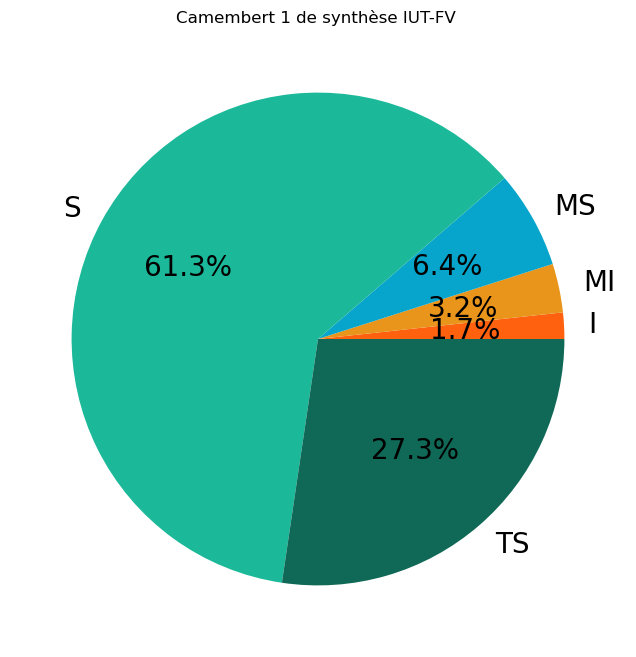

In [23]:
# Chemin vers votre fichier CSV
chemin_fichier_csv = 'globalUIT_1.csv'

# Lecture des données à partir du fichier CSV
categories, valeurs, couleurs = lire_donnees_csv(chemin_fichier_csv)

# Génération du diagramme circulaire
generer_diagramme_circulaire4(categories, valeurs, couleurs,'Camembert 1 de synthèse IUT-FV ',20)

In [24]:
#step 2

In [25]:
# Exemples d'utilisation 5-1
input_file = 'globalUIT_1.csv'  # Nom du fichier CSV d'entrée
output_file = 'globalUIT_2.csv'  # Nom du fichier CSV de sortie
merge_column = 'Critere'  # Nom de la colonne dont les valeurs doivent être fusionnées ;;couleurs

values_to_merge = ['TS', 'S', 'MS']  # Valeurs à fusionner
new_value = 'SATISF'  # Nouvelle valeur après la fusion
sum_column = 'valeur'  # Nom de la colonne à agréger par somme

# Appel de la fonction avec le séparateur par défaut (virgule)
merge_and_aggregate(input_file, output_file, merge_column, values_to_merge, new_value, sum_column, separator=';')

input_file = 'globalUIT_2.csv'  # Nom du fichier CSV de sortie
merge_column = 'Critere'  # Nom de la colonne dont les valeurs doivent être fusionnées ;;couleurs

values_to_merge = ['TI', 'I', 'MI']  # Valeurs à fusionner
new_value = 'INSAT'  # Nouvelle valeur après la fusion
sum_column = 'valeur'  # Nom de la colonne à agréger par somme

# Appel de la fonction avec le séparateur par défaut (virgule)
merge_and_aggregate(input_file, output_file, merge_column, values_to_merge, new_value, sum_column, separator=';')

Le fichier de sortie a été sauvegardé sous globalUIT_2.csv
Le fichier de sortie a été sauvegardé sous globalUIT_2.csv


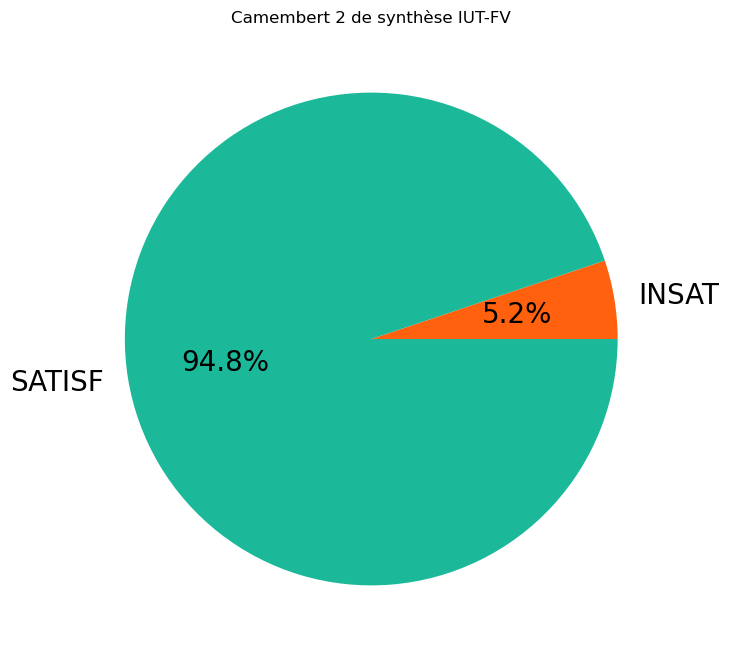

In [26]:
# Chemin vers votre fichier CSV 5-2
chemin_fichier_csv = 'globalUIT_2.csv'

# Lecture des données à partir du fichier CSV
categories, valeurs, couleurs = lire_donnees_csv(chemin_fichier_csv)

# Génération du diagramme circulaire
generer_diagramme_circulaire4(categories, valeurs, couleurs,'Camembert 2 de synthèse IUT-FV',20)

In [27]:
# global UIT.csv

In [28]:
!pip install python-docx

In [29]:
from docx import Document
from docx.shared import Inches
import os

def create_image_grid_docx(image_dir, output_file, column_count=1):
    # Créer un nouveau document Word
    doc = Document()
    
    # Obtenir la liste des fichiers d'images dans le répertoire
    images = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
    
    # Ajouter un titre au document (optionnel)
    doc.add_heading('Grille d\'images', level=1)
    
    # Ajouter un tableau au document
    table = doc.add_table(rows=0, cols=column_count)
    
    # Ajouter les images au tableau en deux colonnes
    for i, image in enumerate(images):
        if i % column_count == 0:
            # Ajouter une nouvelle ligne au tableau
            row_cells = table.add_row().cells
        # Ajouter l'image à la cellule correspondante
        cell = row_cells[i % column_count]
        paragraph = cell.paragraphs[0]
        run = paragraph.add_run()
        image_path = os.path.join(image_dir, image)
        run.add_picture(image_path, width=Inches(5))  # Ajustez la largeur selon vos besoins
    
    # Sauvegarder le document
    doc.save(output_file)
    print(f"Document créé et sauvegardé sous {output_file}")

# Exemples d'utilisation
image_dir = './IMAGES'  # Remplacez par le chemin vers votre répertoire d'images
output_file = 'Camenbert_synthese_1.docx'  # Nom du fichier de sortie

create_image_grid_docx(image_dir, output_file)


Document créé et sauvegardé sous Camenbert_synthese_1.docx


In [30]:
from docx import Document
from docx.shared import Inches
import os

def create_image_grid_docx(image_dir, output_file):
    # Créer un nouveau document Word
    doc = Document()
    files = os.listdir(image_dir)
    # Obtenir la liste des fichiers d'images dans le répertoire
    images = sorted([f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))])

    # Séparer les images en sous-listes de deux images chacune
    image_pairs = [images[i:i+2] for i in range(0, len(images), 2)]

    # Ajouter les paires d'images sur chaque page
    for pair in image_pairs:
        # Ajouter une nouvelle page au document
        doc.add_page_break()
        
        # Centrer chaque page
        for paragraph in doc.paragraphs:
            paragraph.alignment = 1
        
        # Ajouter les images sur deux lignes centrées
        for image in pair:
            paragraph = doc.add_paragraph()
            paragraph.alignment = 1
            run = paragraph.add_run()
            image_path = os.path.join(image_dir, image)
            run.add_picture(image_path, width=Inches(5))  # Ajustez la largeur selon vos besoins

    # Sauvegarder le document
    doc.save(output_file)
    print(f"Document créé et sauvegardé sous {output_file}")

# Exemples d'utilisation
image_dir = './IMAGES'  # Remplacez par le chemin vers votre répertoire d'images
output_file = 'Camenbert_synthese_2.docx'  # Nom du fichier de sortie

create_image_grid_docx(image_dir, output_file)

Document créé et sauvegardé sous Camenbert_synthese_2.docx


In [ ]:
jovian.commit(project="graph-analysis-decison-marking")

<IPython.core.display.Javascript object>